# K-Nearest Neighbors

Here's a recap of our machine learning algorithms so far:

- Linear regression (regression)
- Logistic regression (classification)
- Neural networks (reg & class)
- Decision trees (reg & class)

So far all of these algorithms have been *model-based*, which you will remember is contrasted with *instance-based*
algorithms.


**Model-based:**

- An algorithm that builds a model of the training data
and uses that model to make predictions.

- The training data can be discarded after the model is
created.

**Instance-based:**

- An algorithm that makes new predictions by analyzing
the training data (and comparing the data that we want
a prediction about against the training data).

- The training data must be kept in memory to make
predictions.

We will now explore our first instance-based algorithm.  This algorithm is called k-nearest-neighbors,
and it one of a collection of algorithms that are based around calculating distances from potential new inputs to 
training data points.

<hr>

Nearest neighbor algorithms are among the “simplest” supervised machine learning algorithms and have been well studied in the field of pattern recognition over the last century. 

While nearest neighbor algorithms are not as popular as they once were, they are still widely used in practice, and I highly recommend that you are at least considering the k-Nearest Neighbor algorithm in classification projects as a predictive performance benchmark when you are trying to develop more sophisticated models.

In this lecture, we will primarily talk about two different algorithms, the Nearest Neighbor (NN) algorithm and the k-Nearest Neighbor (kNN) algorithm. NN is just a special case of kNN, where $k = 1$.  I'll usually use the term "kNN" to refer to both 
algorithms in general, however.

## Key concepts

The underlying concept is relatively simple. kNN is an algorithm for supervised learning that simply stores the labeled training examples, a set of $x$'s and a set of $y$'s.  As before, we assume each $x$ is a vector
of numbers (we're assuming the inputs are just numeric right now), and each $y$ is either a number as well (for a regression
problem), or a category/class label (for a classification problem).

Then, to make a prediction (class label or numeric target), the kNN algorithms find the $k$ nearest neighbors of a query point and compute the class label (classification) or numeric target (regression) based on the $k$ nearest (most "similar") points. 

We'll explain exactly what "most similar" means in the next section.

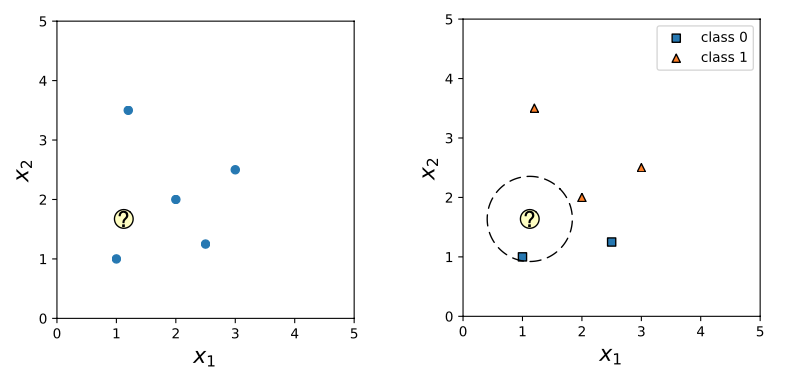

Here's an illustration of the algorithm.
We have two two dimensions (features x1 and x2). On the left, the training examples are shown as blue dots, and a query point that we want to classify is shown as a question mark. On the right, the class labels are shown as blue squares
or red triangles, and the dashed line indicates the nearest neighbor of the query point ($k=1$), assuming a Euclidean distance metric. The predicted class label is the class label of the closest data point in the training set (here: class 0).

Note that the algorithm is clearly **instance-based**.  We have to store all the training data
to make predictions; we don't create any kind of model like we have in previous algorithms that
is then used to make the predictions.

## Parametric vs non-parametric models

Another distinction that is important in ML algorithms is **parametric** vs **non-parametric** models.

- The term "parametric model" simply means the number of parameters in the model is *fixed* ahead of time, and cannot
be changed once we start training the model.  For instance, linear regression, logistic regression, and neural networks
are considered parametric models.  For instance, before we start training a linear/logistic regression model, we have
to pick the number of features so we know the number of weights in our weight vector $w$.  Similarly for neural networks,
we have to pick the number of layers, the size of each layer, and the number of features so we know how to set up the
$W$ matrices.  (Sometimes you will hear the term "hyperparameter" for the number of layers and size of each layer, since
they are *not* parameters [not learned during training, must be set ahead of time].)

- A "non-parametric model" is really a misnomer.  Nonparametric models have parameters, they are just either unbounded (infinite) in number or their number is determined from the training data.  For instance, decision trees are considered
non-parametric because the "parameters" of a decision tree would be the shape of the tree, its size/depth, and the
specific features used at each split point.  In particular, because we don't know ahead of time how deep a decision tree
will be, we don't know how many split points (parameters) we will have.

We call kNN a non-parametric model as well, even though it's not even model-based.  Sometimes you'll hear it's a
non-parametric algorithm instead, but the point is that it's non-parametric because we don't have *any* parameters
we're learning.  Or you can interpret it that the number of parameters is infinite because each training example becomes
a parameter.  It really doesn't matter, but the point is that there is not some weight vector $w$ that we're trying to 
learn.

## Common Use Cases of kNN

While neural networks are gaining popularity in the computer vision and pattern recognition field, one area where k-nearest neighbors models are still commonly and successfully being used is in the intersection between computer vision, pattern classification, and biometrics (e.g., to make predictions based on extracted geometrical features).

Other common use cases include recommender systems (via collaborative filtering) and outlier detection.

## Algorithm

Let's talk about the NN ($k=1$) algorithm first.

To train NN (if you can even call it that):

- Store all training examples ($x^{(i)}, y^{(i)}$) in a list/database/table (something we can iterate over).

Prediction algorithm for NN:

- Given a new data point ($x$) that we want to predict either a number or class for:

- Loop over all training examples ($x^{(i)}, y^{(i)}$) and find the $x^{(i)}$ that minimizes the distance
$d(x^{(i)}, x)$.  (Note that we haven't specified what this $d$ function is.)

- Whichever $x^{(i)}$ minimizes $d(x^{(i)}, x)$, output the corresponding $y^{(i)}$ as the prediction value (either
a number or class).


## The $d$ function

The $d$ function stands for "distance" and can technically be any function that computes some notion of how
"similar" two points are.  The standard distance function (sometimes called a "metric") is the Euclidean distance:

$d(x^{(a)}, x^{(b)}) = \displaystyle \sqrt{\sum_{j=1}^m \left( x^{(a)}_j - x^{(b)}_j \right)^2}$

where $x^{(a)}$ and $x^{(b)}$ are arbitrary points either from the training set or a new query point.

We will look at some alternate distance functions later.

## Decision boundary

Recall that in classification problems, we can plot the "decision boundary" for a problem.  This is a line or curve
through the $j$-dimensional space where the $x$ points live.  In other words, if there are two features, this is a
2-dimensional space that we can draw a line or curve through that separates how every possible point in the space
would hypothetically be classified.

In this section, we will build some intuition for the decision boundary of the NN classification model.

Assuming a Euclidean distance metric, the decision boundary between any two training examples $a$ and $b$ is a straight line. If a query point is located on the decision boundary, this means its equidistant from both training example $a$ and $b$.

The entire decision boundary for a NN classifier is made up of line segments of these individual straight lines.

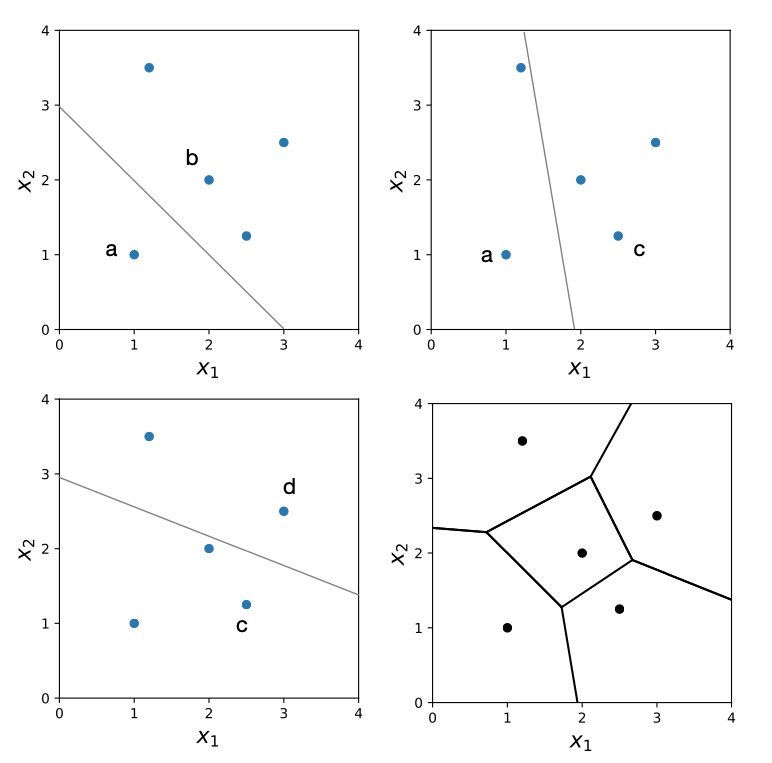

The first three images above show the boundary lines between three pairs of points.  The 4th image is a combination of those
lines, isolating each point.  The final decision boundary will be a combination of the line segments in the 4th diagram.

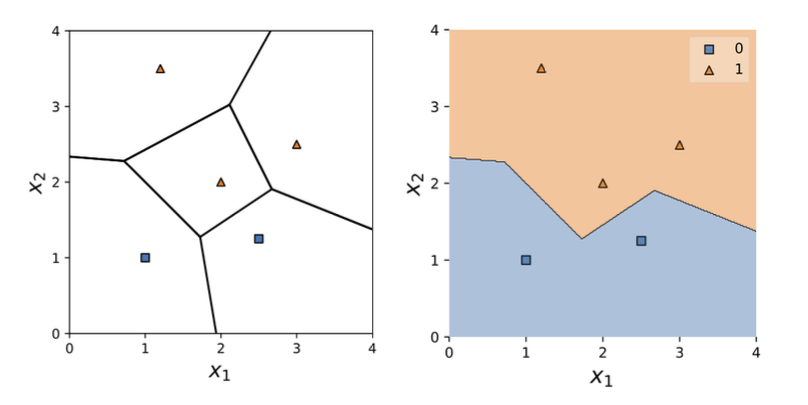

If we assume the classes for the points are labeled as such on the left above, then the final decision boundary will
be as shown on the right.  Any change to a label (flipping its class) would flip the corresponding section of the left image
above to the opposite color.

## k-Nearest Neighbor Classification and Regression

Previously, we described the NN algorithm, which makes a prediction by assigning the class label or continuous target value of the most similar training example to the query point (where similarity is typically measured using the Euclidean distance metric for numeric features).

Instead of basing the prediction of the single, most similar training example, kNN considers the $k$ nearest neighbors when predicting a class label (in classification) or a numeric target value (in regression).

### Classification

In the classification setting, the simplest incarnation of the kNN model is to predict the target class label as the class label that is most often represented among the $k$ most similar training examples for a given query point. In other words, the class label can be considered as the “mode” of the k training labels or the outcome of a “plurality voting.” 

Note that in literature, kNN classification is often described as a “majority voting.” While the authors usually mean the right thing, the term “majority voting” is a bit unfortunate as it typically refers to a reference value of >50% for making a decision. In the case of binary predictions (classification problems with two classes), there is always a majority or a tie. Hence, a majority vote is also automatically a plurality vote. However, in multi-class settings, we do not require a majority to make a prediction via kNN. For example, in a three-class setting a frequency > 13 (approx 33.3%) could already enough to assign a class label.

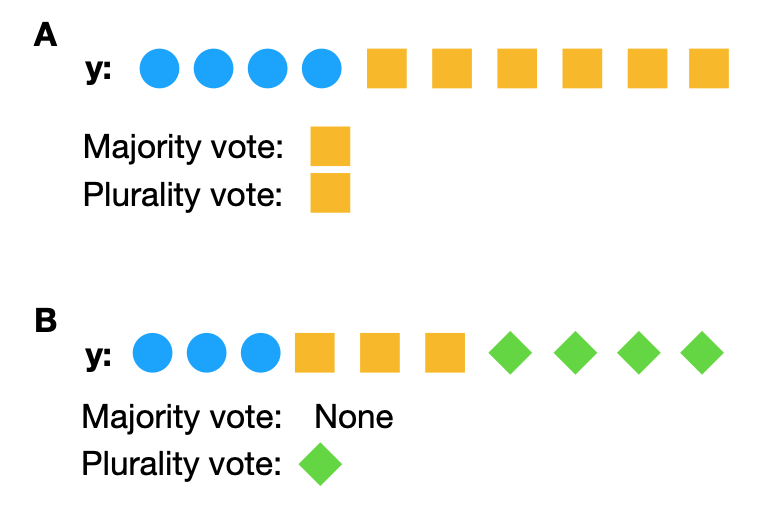

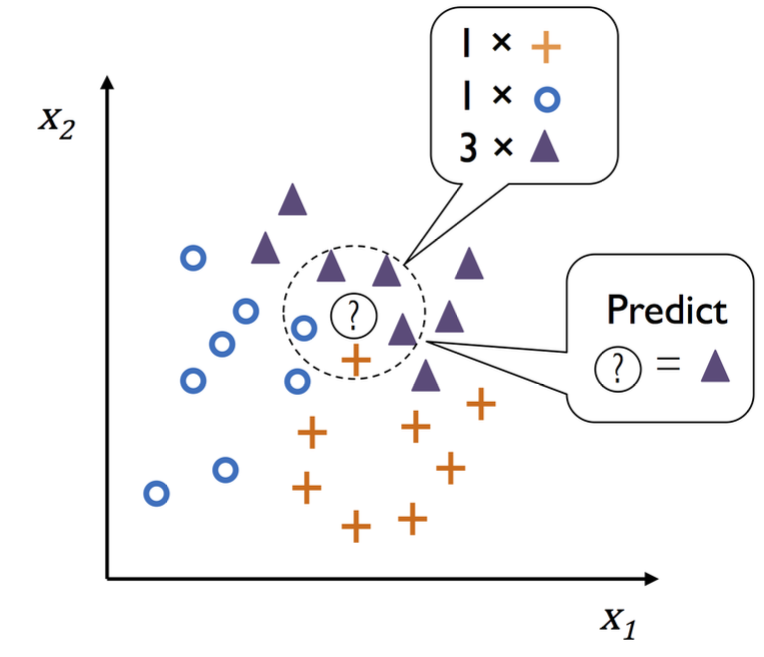

### Regression

In NN, we have the same prediction rule for both classification and regression (predict the target value of the 
closest point).  In kNN, however, the rule changes for regression:  we choose the **average** of the 
target variables (which are now numbers rather than categories/classes) of the $k$ nearest neighbors.

As an alternative to averaging the target values of the k nearest neighbors to predict the
label of a query point, it is also not uncommon to use the median instead.

## Curse of Dimensionality

The kNN algorithm is particularly susceptible to the **curse of dimensionality**. In machine learning, the curse of dimensionality refers to scenarios with a fixed size of training examples but an increasing number of dimensions and range of feature values in each dimension in a high-dimensional feature space.

In kNN an increasing number of dimensions becomes increasingly problematic because the more dimensions we add, the larger the volume in the feature space needs to be to capture a
a fixed number of neighbors. As the volume grows larger and larger, the “neighbors” become less and less “similar” to the query point as they are now all relatively distant from the query point considering all different dimensions that are included when computing the pairwise distances.

For example, consider a training set with one feature that can only range between 0 and 1.  So we have a 1-dimensional feature space (represented by just a segment of a number line).  Now, imagine randomly distributing 100 training
examples along this segment.  You would expect there to be (roughly) one point at every 0.01 interval.  So if we wanted
to select a region of this space that would include three points, the smallest it would probably be is about 0.03 wide,
and therefore encloses about 3% of the total space.

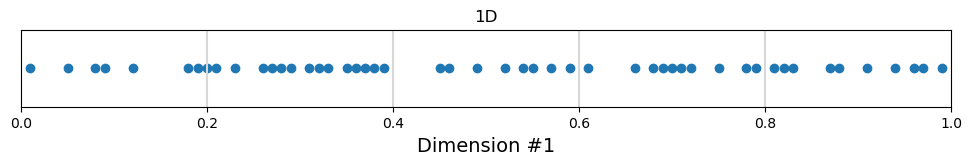

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
fig = plt.figure()
ax  = plt.axes()
fig.set_size_inches(12, 1)
x = np.array(random.sample(range(0, 100), 50))/100 
y = [0 for xval in x]
plt.scatter(x, y)
# Grid lines
for grid_pt in [.20, .40, .60, .80]:
    plt.axvline(x=grid_pt, color='#D8D8D8')
ax.set_xlim((0,1))
ax.set_xlabel("Dimension #1", fontsize=14)
ax.set_ylabel("")
plt.yticks([], [])
plt.title("1D")
plt.show()

Now imagine using two features, each also between 0 and 1.  Now the feature space is a square in two dimensions.  Again,
imagine distributing 100 points randomly in the square.  But how far away is each point from each other now


If we add a second dimension, the expected interval length that is required to include the same amount of data (3 neighbors) now increases to $0.03^{1/2}$ (we now have a unit rectangle). In other words, instead of requiring 0.03 × 100% = 3% of the space to include 3 neighbors in 1D, we now need to consider $0.03^{1/2}$ × 100% = 17.3% of a 2D space to cover the same amount of data points – the density decreases with the number of dimensions. In 10 dimensions, that’s now $0.03^{1/10}$ = 70.4% of the hypervolume we need to consider to include three neighbors on average. You can see that in high dimensions we need to take a large portion of the hypervolume into consideration (assuming a fixed number of training examples) to find k nearest neighbors, and then these so-called “neighbors” may not be particularly “close” to the query point anymore.

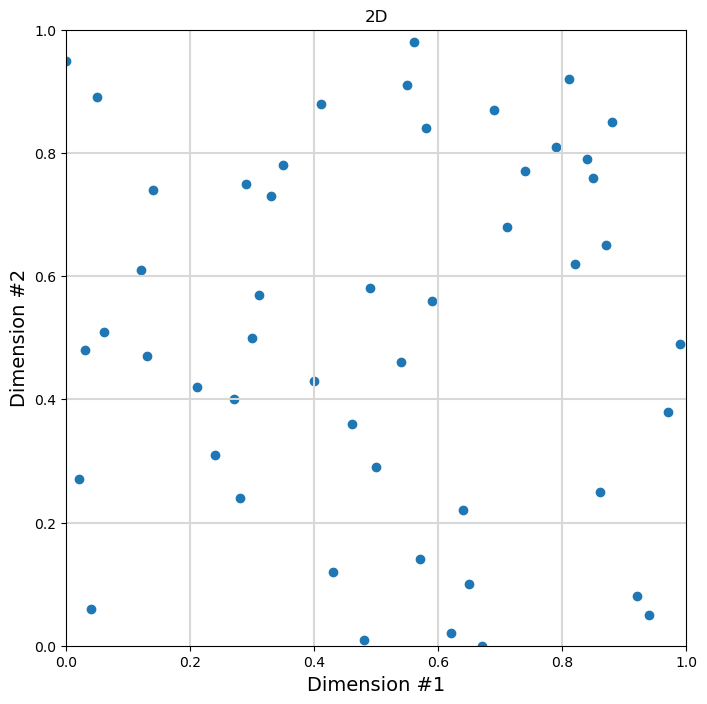

In [9]:
fig = plt.figure()
ax  = plt.axes()
fig.set_size_inches(8, 8)
# Now each point has 2 dimensions (x,y)
x = np.array(random.sample(range(0, 100), 50))/100 
y = np.array(random.sample(range(0, 100), 50))/100
plt.scatter(x, y)
# Grid lines
for grid_pt in [.20, .40, .60, .80]:
    plt.axvline(x=grid_pt, color='#D8D8D8')
    plt.axhline(y=grid_pt, color='#D8D8D8')
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_xlabel("Dimension #1", fontsize=14)
ax.set_ylabel("Dimension #2", fontsize=14)
plt.title("2D")
plt.show()

A different way of thinking about this is that to fill a the unit **rectangle** as tightly as the
unit **line segment** was filled, we would need not 100 points, but approximately 3333 points.  
(You can figure this out from the math above.)

So another takeaway here is that as you increase the number of features of your data, you must also
increase the size of your data set to avoid the curse of dimensionality.  However, often this is hard,
because the math above implies that the data set needs to grow exponentially big as a function of the number of
features.

## Big O of kNN

Naive implementations of kNN are $O(kn)$.  We use the idea for NN and run it $k$ times (with slight modifications each
time to not get repeat points) to get our $k$ points:

```
Assume we are given a query point x.

set_of_points = empty set
for p = 1 to k
  find the point in the training set that is closest to x according to the distance function d,
    skipping over points already in set_of_points.
  add the point to set_of_points.
```

A cool modification is to use a priority queue (stored as a heap) instead.  

We initialize the heap with the k arbitrary points from the training dataset based on their distances to the query point. Then, as we iterate through the dataset to find the first nearest neighbor of the query point, at each step, we make a comparison with the points and distances in the heap. If the point with the largest stored distance in the heap is farther away from the query point that the current point under consideration, we remove the farthest point from the heap and insert the current point. Once we finished one iteration over the training dataset, we now have a set of the k nearest neighbors.

This is one pass over the training set (n iterations) and each iteration does ($\log k$) work because the heap never grows
bigger than $k$ items, for a big-oh of $O(n\log k)$.

## Dimensionality Reduction

There are methods to counter the curse of dimensionality that reduce the number of dimensions of our training data,
instead of trying to increase the amount of training data.  Obviously we can get rid of dimensions by throwing out 
some features entirely,
but there are other ways of doing this by looking for correlations among features and then creating a new set of 
**specifically uncorrelated** 
features from the original ones.  Two methods of doing this are called Principal Component Analysis and Linear
Discriminant Analysis, that we will look at later.

## Other distance metrics

There are many distance metrics or measures we can use to select k nearest neighbors. There
is no “best” distance measure, and the choice is highly context- or problem-dependent.

For continuous features, the probably most common distance metric is the Euclidean distance. Another popular choice is the Manhattan distance,


$$d(x^{(a)}, x^{(b)}) = \displaystyle {\sum_{j=1}^m \left| x^{(a)}_j - x^{(b)}_j \right|}$$
which emphasizes differences between “distant” feature vectors or outliers less than the
Euclidean distance.

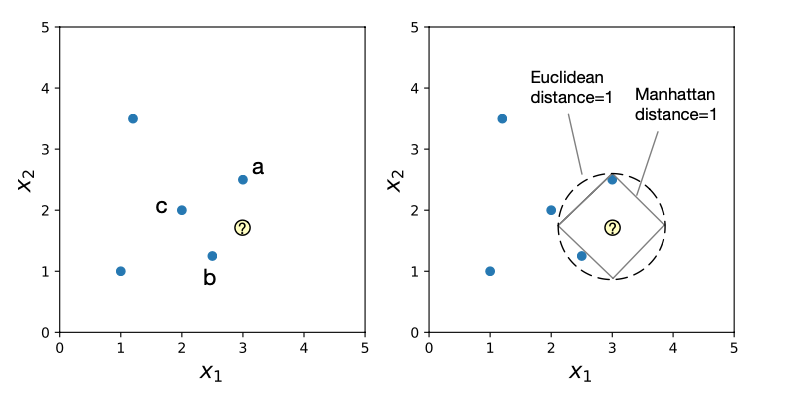

A generalization of the Euclidean or Manhattan distance is the so-called Minkowski distance,

$$d(x^{(a)}, x^{(b)}) = \displaystyle \left[ \sum_{j=1}^m \left( x^{(a)}_j - x^{(b)}_j \right)^p \right]^{1/p}$$


which is equal to the Euclidean distance if p = 2 and equal to the Manhattan distance if
p = 1.

## Handling categorical features

Any distance metric can be used with categorical features if the features are binary (use 0's and 1's) or
if they are multi-class, turn them into one-hot vectors.  For instance, with a set of binary features, the
Manhattan distance is very popular, and is typically known as the Hamming distance in this situation.

The Hamming distance is also called overlap metric, because it essentially measures how many positions in two vectors are different. 

Example:

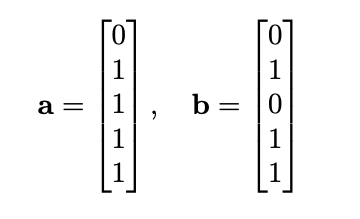

The Hamming distance is one, because the vectors only differ in one position.

One special example deserves mention: 
If we are working with vectors containing word counts of documents and we want to measure the similarity (or distance) between two documents, **cosine similarity** could be a metric that is more appropriate than, for example, the Euclidean distance. The cosine similarity is defined as the the dot-product between two vectors normalized by their magnitude:

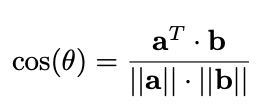

## Feature Scaling

Feature scaling is **critical** when using nearest neighbor algorithms, because we want all our features
to be on similar scales, otherwise the distances will be dominated by the features with larger ranges.

We typically use Z-score normalization.

Advantages
- Easy to implement: Given the algorithm’s simplicity and accuracy, it's super easy to code up.

- Adapts easily: As new training samples are added, the algorithm adjusts to account for any new data since all training data is stored into memory.

- Few hyperparameters: kNN only requires a k value and a distance metric, which is low when compared to other machine learning algorithms.

Disadvantages
- Does not scale well: Since kNN is an instance-based algorithm, it takes up more memory and data storage compared to other classifiers. This can be costly from both a time and money perspective. 

- Curse of dimensionality: The kNN algorithm tends to fall victim to the curse of dimensionality, which means that it doesn’t perform well with high-dimensional data inputs. 

- Prone to overfitting: Due to the “curse of dimensionality”, kNN is also more prone to overfitting. While feature selection and dimensionality reduction techniques are leveraged to prevent this from occurring, the value of k can also impact the model’s behavior. Lower values of k can overfit the data, whereas higher values of k tend to “smooth out” the prediction values since it is averaging the values over a greater area, or neighborhood. However, if the value of k is too high, then it can underfit the data.  (What happens if $k$ is really big?)